# **Importing Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile

with zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

# **Main Code Start**

In [5]:
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [6]:
DATA_DIR = '/content/dogs_vs_cats'
TRAIN_DATA_DIR = os.path.join(DATA_DIR, 'train')
#VALID_DATA_DIR = os.path.join(DATA_DIR, 'valid')
TEST_DATA_DIR = os.path.join(DATA_DIR, 'test')

In [7]:
TRAIN_DATA_DIR

'/content/dogs_vs_cats/train'

In [8]:
TEST_DATA_DIR

'/content/dogs_vs_cats/test'

In [9]:
IMG_SIZE = 128
CATEGORIES = []

for i in os.listdir(TRAIN_DATA_DIR):
    CATEGORIES.append(i)

print(CATEGORIES)

['cats', 'dogs']


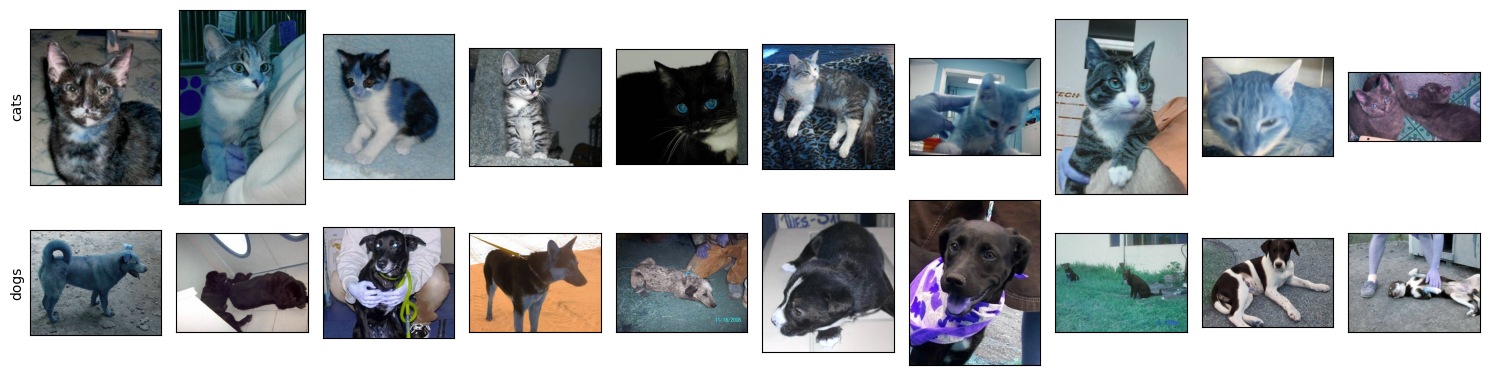

In [10]:
plt.figure(figsize=(15,4))
i=0
for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(2,10,i+1)
        plt.imshow(img_array)
        if i%10 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i%10 == 0:
            break

plt.tight_layout()
plt.show()

# **Data Pre-Processing**

In [11]:
training_data = []

for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))   # read the image
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize the image
            training_data.append([img_resized, CATEGORIES.index(c)]) # [ [img, 0], [], [], [], ...., []]
        except Exception as e:
            pass

print(len(training_data))

20000


### Summary
- **Initialize:** Create an empty list `training_data` to store processed image-label pairs.
- **Iterate Through Categories:** Loop through each category in `CATEGORIES`.
- **Construct File Paths:** Use `os.path.join()` to form the path to each category's folder.
- **Process Each Image:**
  - Read the image using `cv2.imread()`.
  - Resize it to `(IMG_SIZE, IMG_SIZE)` using `cv2.resize()`.
  - Append the resized image and its label to `training_data`.
- **Handle Errors:** Use `try-except` to skip problematic files without interrupting the process.
- **Output Result:** Print the total number of successfully processed images.

This code preprocesses a dataset of images, resizing them to a uniform size and labeling them for machine learning tasks.

In [12]:
test_data = []

for c in CATEGORIES:
    path = os.path.join(TEST_DATA_DIR, c)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))   # read the image
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize the image
            test_data.append([img_resized, CATEGORIES.index(c)]) # [ [img, 0], [], [], [], ...., []]
        except Exception as e:
            pass

print(len(test_data))

5000


In [15]:
random.shuffle(training_data)
random.shuffle(test_data)

In [17]:
X_train = []
Y_train = []

for img, label in training_data:
    X_train.append(img)
    Y_train.append(label)

X_train = np.array(X_train).astype('float32').reshape(-1,128,128,3) # -1: Automatically calculates the number of samples.
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

X_train= (20000, 128, 128, 3) Y_train= (20000,)


### Summary:
- **Purpose**: Split `training_data` into features (`X_train`) and labels (`Y_train`).
- **Steps**:
  1. **Extract Data**: Loop through `training_data` and append images to `X_train` and labels to `Y_train`.
  2. **Convert to NumPy Arrays**:
     - `X_train`: Converted to a NumPy array, reshaped to `(num_samples, 128, 128, 3)`, and set to `float32` for compatibility with ML frameworks.
     - `Y_train`: Converted to a NumPy array.
  3. **Shape Check**: Print the shapes of `X_train` and `Y_train` to verify data formatting.
- **Output**:
  - `X_train`: Contains image data (`num_samples, 128, 128, 3`).
  - `Y_train`: Contains corresponding labels (`num_samples,`).
  
This prepares the data for model training.

In [18]:
X_test = []
Y_test = []

for features,label in test_data:
    X_test.append(features)
    Y_test.append(label)

X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_test = np.array(Y_test)

print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_test= (5000, 128, 128, 3) Y_test= (5000,)


In [21]:
import os

# Ensure the directory exists
output_dir = "/content/drive/MyDrive/Data Science"
os.makedirs(output_dir, exist_ok=True)

# Save X_train
pickle_out = open(os.path.join(output_dir, "X_train.pickle"), "wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

# Save Y_train
pickle_out = open(os.path.join(output_dir, "Y_train.pickle"), "wb")
pickle.dump(Y_train, pickle_out)
pickle_out.close()

# Save X_test
pickle_out = open(os.path.join(output_dir, "X_test.pickle"), "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

# Save Y_test
pickle_out = open(os.path.join(output_dir, "Y_test.pickle"), "wb")
pickle.dump(Y_test, pickle_out)
pickle_out.close()
